In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# First, upload train.csv and test.csv to your Google Drive
# Then use this code:
import pandas as pd

# Adjust path based on where you saved the files
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [6]:
# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')  # Adjust path if needed

# Display basic information
print("Dataset Loaded Successfully!")
print(f"\nDataset Shape: {train_df.shape}")
print(f"Total Passengers: {len(train_df)}")
print(f"Features: {train_df.shape[1]}")

Dataset Loaded Successfully!

Dataset Shape: (891, 12)
Total Passengers: 891
Features: 12


In [7]:
# Display first few rows
print("🔍 First 5 Rows of Data:\n")
display(train_df.head())

print("\n" + "="*80)
print("Dataset Information:\n")
train_df.info()

🔍 First 5 Rows of Data:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("Statistical Summary:\n")
display(train_df.describe())

print("\n Categorical Features Summary:\n")
display(train_df.describe(include=['object']))

Statistical Summary:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Categorical Features Summary:



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


🔴 Missing Values Summary:



,Column,Missing_Count,Missing_Percentage
Cabin,Cabin,687,77.104377
Age,Age,177,19.865320
Embarked,Embarked,2,0.224467


<Figure size 800x400 with 0 Axes>

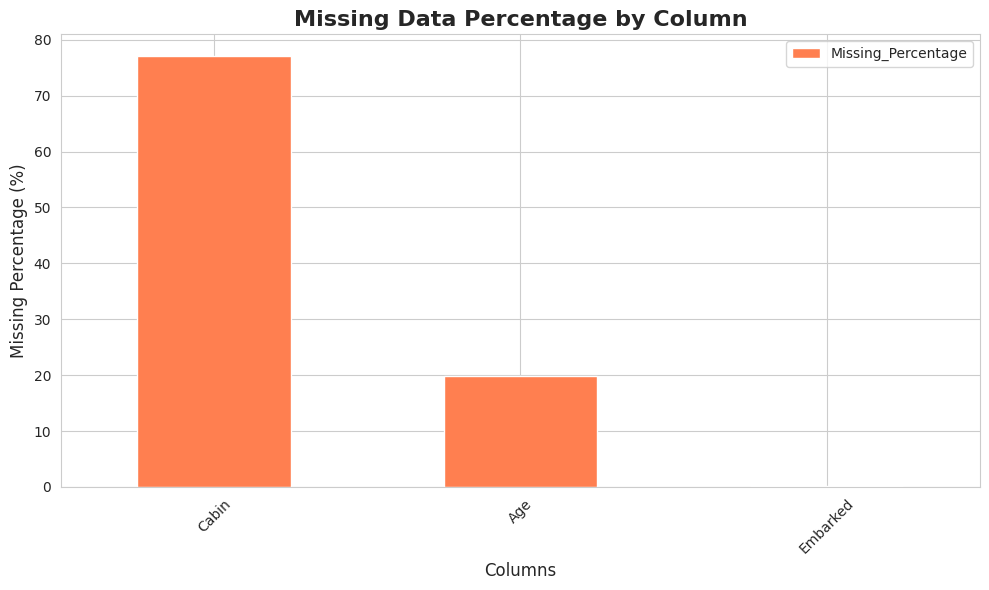

In [9]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': train_df.columns,
    'Missing_Count': train_df.isnull().sum(),
    'Missing_Percentage': (train_df.isnull().sum() / len(train_df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    by='Missing_Percentage',
    ascending=False
)

print("🔴 Missing Values Summary:\n")
display(missing_data)

# Visualize missing data
plt.figure(figsize=(8, 4))
missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', color='coral')
plt.title('Missing Data Percentage by Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Overall Survival Statistics:

Survived: 38.38%
Did Not Survive: 61.62%


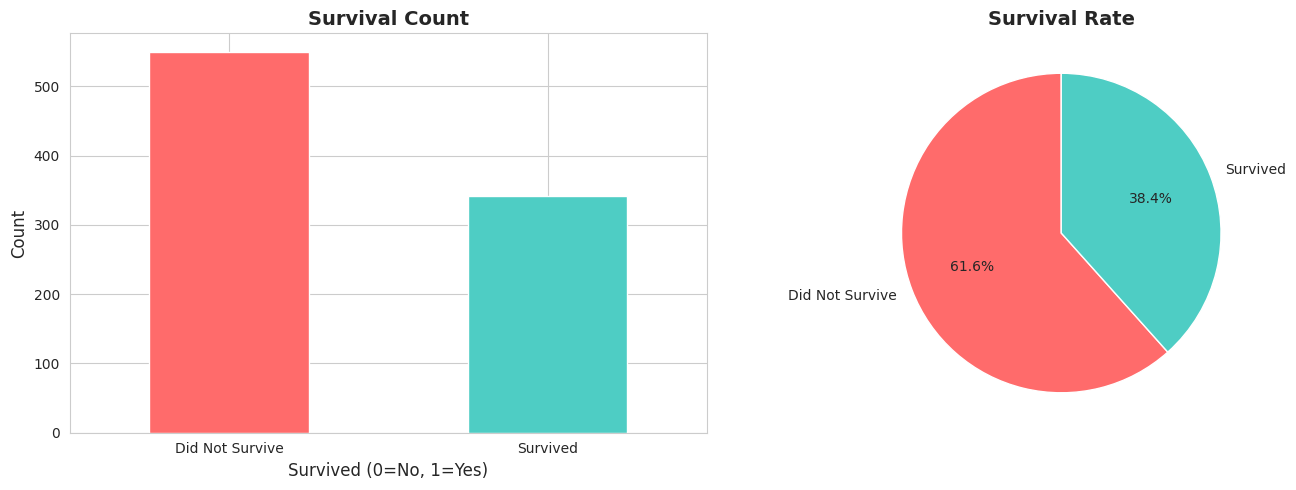

In [10]:
# Overall survival rate
survival_rate = train_df['Survived'].value_counts(normalize=True) * 100

print("📊 Overall Survival Statistics:\n")
print(f"Survived: {survival_rate[1]:.2f}%")
print(f"Did Not Survive: {survival_rate[0]:.2f}%")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
train_df['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Survived (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Did Not Survive', 'Survived'], rotation=0)

# Pie chart
train_df['Survived'].value_counts().plot(
    kind='pie',
    ax=axes[1],
    autopct='%1.1f%%',
    colors=['#ff6b6b', '#4ecdc4'],
    labels=['Did Not Survive', 'Survived'],
    startangle=90
)
axes[1].set_ylabel('')
axes[1].set_title('Survival Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

👫 Survival Rate by Gender:

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

🎫 Survival Rate by Passenger Class:

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


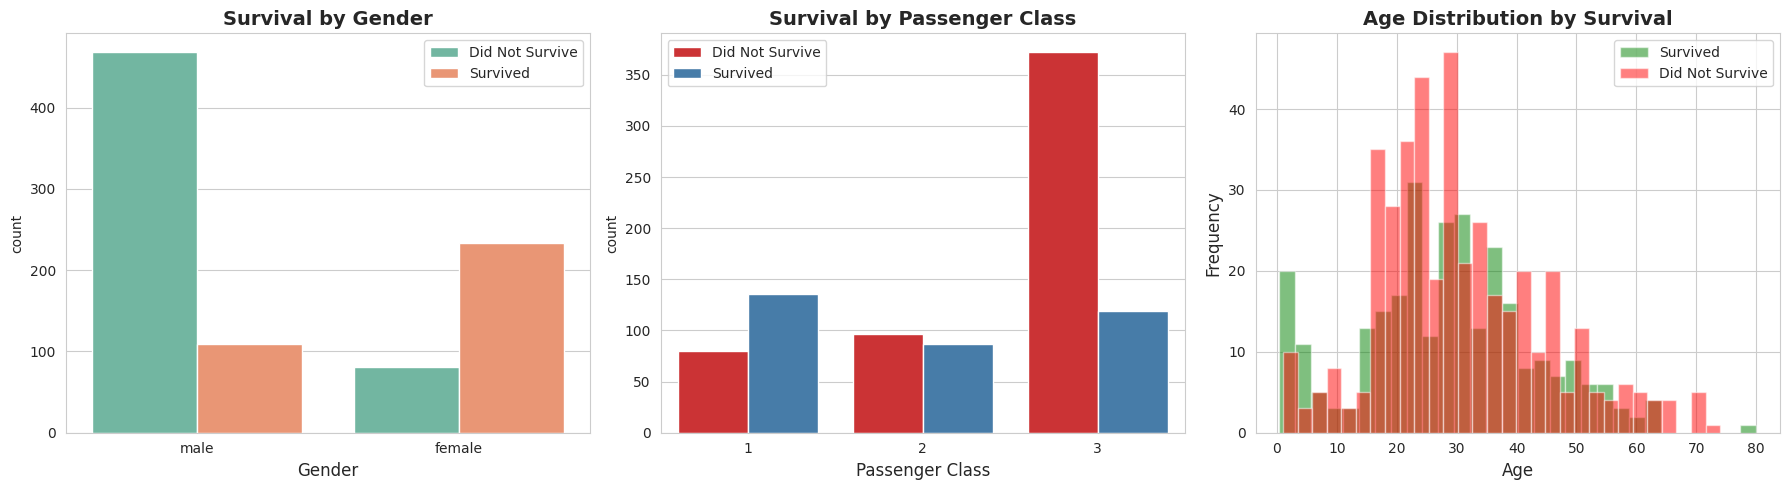

In [11]:
# Survival by Gender
print("👫 Survival Rate by Gender:\n")
gender_survival = pd.crosstab(train_df['Sex'], train_df['Survived'], normalize='index') * 100
print(gender_survival)

# Survival by Class
print("\n🎫 Survival Rate by Passenger Class:\n")
class_survival = pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index') * 100
print(class_survival)

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs Survival
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=axes[0], palette='Set2')
axes[0].set_title('Survival by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'])

# Class vs Survival
sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=axes[1], palette='Set1')
axes[1].set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class', fontsize=12)
axes[1].legend(['Did Not Survive', 'Survived'])

# Age distribution
train_df[train_df['Survived']==1]['Age'].hist(bins=30, alpha=0.5, label='Survived', ax=axes[2], color='green')
train_df[train_df['Survived']==0]['Age'].hist(bins=30, alpha=0.5, label='Did Not Survive', ax=axes[2], color='red')
axes[2].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Age', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].legend()

plt.tight_layout()
plt.show()

In [12]:
# data preprocessing
# Create a copy for preprocessing
df_processed = train_df.copy()

print("🔧 Handling Missing Values...\n")

# 1. Fill Age with median
median_age = df_processed['Age'].median()
df_processed['Age'].fillna(median_age, inplace=True)
print(f"✅ Age: Filled {train_df['Age'].isnull().sum()} missing values with median ({median_age:.1f})")

# 2. Fill Embarked with mode
mode_embarked = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(mode_embarked, inplace=True)
print(f"✅ Embarked: Filled {train_df['Embarked'].isnull().sum()} missing values with mode ({mode_embarked})")

# 3. Fill Fare with median
median_fare = df_processed['Fare'].median()
df_processed['Fare'].fillna(median_fare, inplace=True)
print(f"✅ Fare: Filled missing values with median ({median_fare:.2f})")

# 4. Drop Cabin (too many missing values)
df_processed.drop('Cabin', axis=1, inplace=True)
print(f"✅ Cabin: Dropped (81.0% missing)")

# Verify no missing values remain
print(f"\n✅ Remaining missing values: {df_processed.isnull().sum().sum()}")

🔧 Handling Missing Values...

✅ Age: Filled 177 missing values with median (28.0)
✅ Embarked: Filled 2 missing values with mode (S)
✅ Fare: Filled missing values with median (14.45)
✅ Cabin: Dropped (81.0% missing)

✅ Remaining missing values: 0


In [13]:
print("🛠️ Creating New Features...\n")

# 1. Family Size
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
print(f"✅ Created 'FamilySize' feature")

# 2. Is Alone
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
print(f"✅ Created 'IsAlone' feature")

# 3. Title extraction from Name
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Countess': 'Rare',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Mme': 'Mrs',
    'Capt': 'Rare',
    'Sir': 'Rare'
}

df_processed['Title'] = df_processed['Title'].map(title_mapping)
df_processed['Title'].fillna('Rare', inplace=True)
print(f"✅ Created 'Title' feature from names")

# 4. Age Groups
df_processed['AgeGroup'] = pd.cut(
    df_processed['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)
print(f"✅ Created 'AgeGroup' feature")

# 5. Fare Groups
df_processed['FareGroup'] = pd.qcut(
    df_processed['Fare'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High'],
    duplicates='drop'
)
print(f"✅ Created 'FareGroup' feature")

print("\n📊 New Features Created:")
print(df_processed[['FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FareGroup']].head())

🛠️ Creating New Features...

✅ Created 'FamilySize' feature
✅ Created 'IsAlone' feature
✅ Created 'Title' feature from names
✅ Created 'AgeGroup' feature
✅ Created 'FareGroup' feature

📊 New Features Created:
   FamilySize  IsAlone Title     AgeGroup  FareGroup
0           2        0    Mr  Young Adult        Low
1           2        0   Mrs        Adult  Very High
2           1        1  Miss  Young Adult     Medium
3           2        0   Mrs  Young Adult  Very High
4           1        1    Mr  Young Adult     Medium


In [14]:
#encode categorical variables
print("🔄 Encoding Categorical Variables...\n")

# 1. Binary encoding for Sex
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
print("✅ Sex: Encoded (male=0, female=1)")

# 2. One-hot encoding for Embarked
embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked', drop_first=True)
df_processed = pd.concat([df_processed, embarked_dummies], axis=1)
print("✅ Embarked: One-hot encoded")

# 3. One-hot encoding for Title
title_dummies = pd.get_dummies(df_processed['Title'], prefix='Title', drop_first=True)
df_processed = pd.concat([df_processed, title_dummies], axis=1)
print("✅ Title: One-hot encoded")

# 4. One-hot encoding for AgeGroup
age_dummies = pd.get_dummies(df_processed['AgeGroup'], prefix='Age', drop_first=True)
df_processed = pd.concat([df_processed, age_dummies], axis=1)
print("✅ AgeGroup: One-hot encoded")

# 5. One-hot encoding for FareGroup
fare_dummies = pd.get_dummies(df_processed['FareGroup'], prefix='Fare', drop_first=True)
df_processed = pd.concat([df_processed, fare_dummies], axis=1)
print("✅ FareGroup: One-hot encoded")

print("\n✅ All categorical variables encoded!")

🔄 Encoding Categorical Variables...

✅ Sex: Encoded (male=0, female=1)
✅ Embarked: One-hot encoded
✅ Title: One-hot encoded
✅ AgeGroup: One-hot encoded
✅ FareGroup: One-hot encoded

✅ All categorical variables encoded!


In [15]:
#drop uncessary columns
print("🗑️ Dropping Unnecessary Columns...\n")

# Columns to drop
drop_columns = [
    'PassengerId', 'Name', 'Ticket',
    'Embarked', 'Title', 'AgeGroup', 'FareGroup'
]

df_processed.drop(drop_columns, axis=1, inplace=True, errors='ignore')

print(f"✅ Dropped: {', '.join(drop_columns)}")
print(f"\n📊 Final Dataset Shape: {df_processed.shape}")
print(f"Features for modeling: {df_processed.shape[1] - 1}")  # -1 for target variable

# Display final features
print("\n📋 Final Features:")
print(df_processed.columns.tolist())

🗑️ Dropping Unnecessary Columns...

✅ Dropped: PassengerId, Name, Ticket, Embarked, Title, AgeGroup, FareGroup

📊 Final Dataset Shape: (891, 22)
Features for modeling: 21

📋 Final Features:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_Teenager', 'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Fare_Medium', 'Fare_High', 'Fare_Very High']


In [16]:
#Model Training
print("📦 Preparing Data for Modeling...\n")

# Separate features and target
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\n✅ Data Split Complete:")
print(f"Training set: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")

# Feature Scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled using StandardScaler")

📦 Preparing Data for Modeling...

Features (X) shape: (891, 21)
Target (y) shape: (891,)

✅ Data Split Complete:
Training set: 712 samples (79.9%)
Testing set: 179 samples (20.1%)

✅ Features scaled using StandardScaler


In [17]:
#random forest classifier
print("🌲 Training Random Forest Classifier...\n")

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")
print(f"\nModel Parameters:")
print(f"  • Number of trees: {rf_model.n_estimators}")
print(f"  • Max depth: {rf_model.max_depth}")
print(f"  • Features used: {rf_model.n_features_in_}")

🌲 Training Random Forest Classifier...

✅ Random Forest model trained successfully!

Model Parameters:
  • Number of trees: 100
  • Max depth: 10
  • Features used: 21


In [18]:
#decision tree classifier
print("🌳 Training Decision Tree Classifier...\n")

# Initialize the model
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully!")
print(f"\nModel Parameters:")
print(f"  • Max depth: {dt_model.max_depth}")
print(f"  • Features used: {dt_model.n_features_in_}")

🌳 Training Decision Tree Classifier...

✅ Decision Tree model trained successfully!

Model Parameters:
  • Max depth: 10
  • Features used: 21


In [19]:
#model evaluation
print("🎯 Making Predictions...\n")

# Random Forest predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Decision Tree predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

print("✅ Predictions generated for both models!")

🎯 Making Predictions...

✅ Predictions generated for both models!


📊 MODEL PERFORMANCE COMPARISON

🌲 RANDOM FOREST CLASSIFIER:
  Training Accuracy:   91.15%
  Testing Accuracy:    81.56%
  Overfitting Gap:     9.59%

🌳 DECISION TREE CLASSIFIER:
  Training Accuracy:   91.57%
  Testing Accuracy:    81.01%
  Overfitting Gap:     10.57%



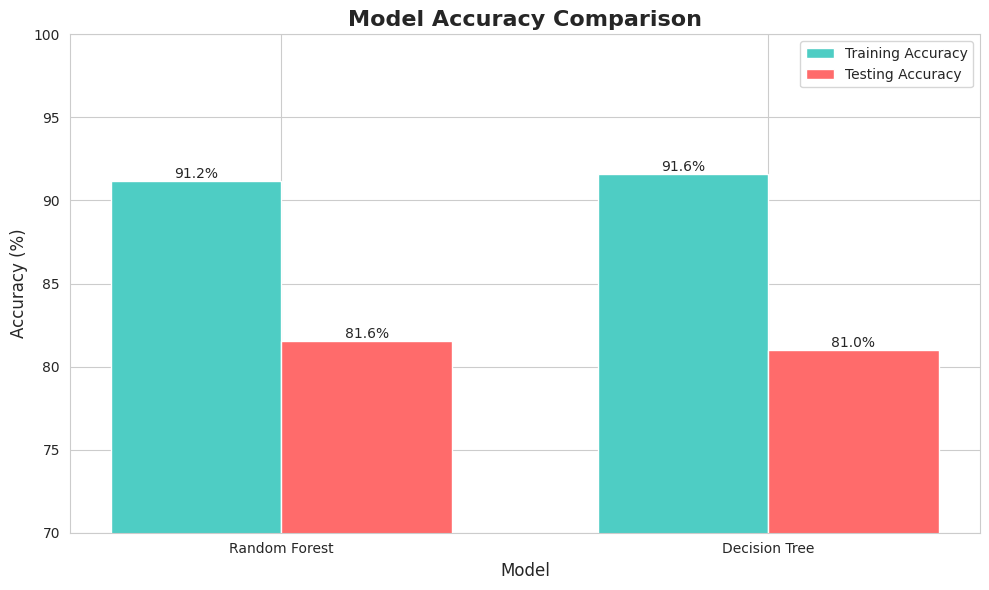

In [20]:
#calculate accuracy
print("📊 MODEL PERFORMANCE COMPARISON\n")
print("="*60)

# Random Forest Accuracy
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

# Decision Tree Accuracy
dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)

# Display results
print("🌲 RANDOM FOREST CLASSIFIER:")
print(f"  Training Accuracy:   {rf_train_acc*100:.2f}%")
print(f"  Testing Accuracy:    {rf_test_acc*100:.2f}%")
print(f"  Overfitting Gap:     {(rf_train_acc - rf_test_acc)*100:.2f}%\n")

print("🌳 DECISION TREE CLASSIFIER:")
print(f"  Training Accuracy:   {dt_train_acc*100:.2f}%")
print(f"  Testing Accuracy:    {dt_test_acc*100:.2f}%")
print(f"  Overfitting Gap:     {(dt_train_acc - dt_test_acc)*100:.2f}%\n")

print("="*60)

# Visual comparison
models = ['Random Forest', 'Decision Tree']
train_scores = [rf_train_acc*100, dt_train_acc*100]
test_scores = [rf_test_acc*100, dt_test_acc*100]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Training Accuracy', color='#4ecdc4')
bars2 = ax.bar(x + width/2, test_scores, width, label='Testing Accuracy', color='#ff6b6b')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([70, 100])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

📊 CONFUSION MATRICES



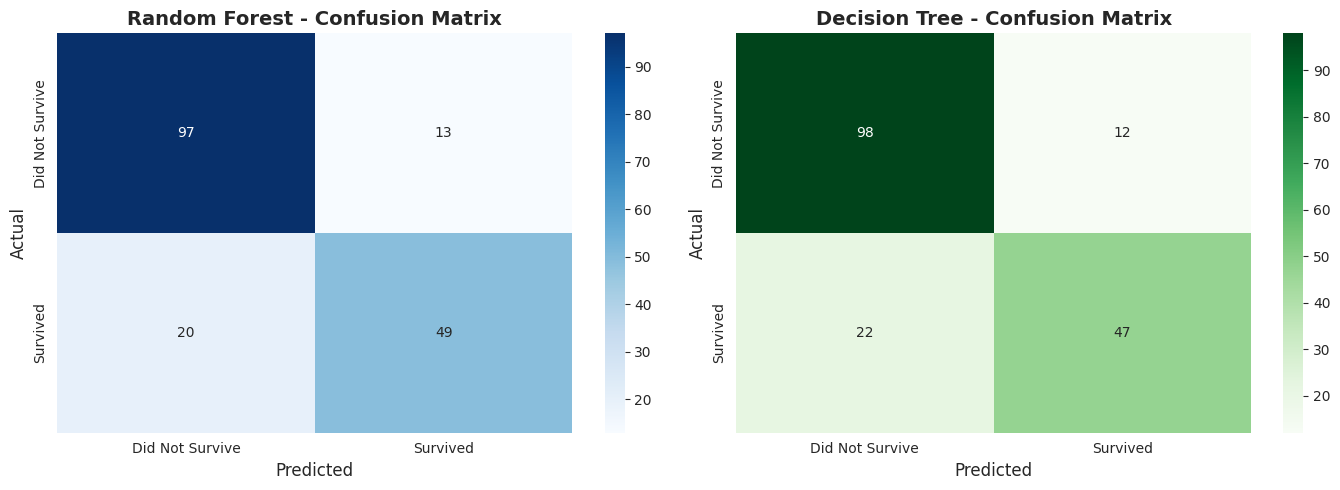

📖 Confusion Matrix Interpretation:

Random Forest:
  True Negatives:  97 (Correctly predicted 'Did Not Survive')
  False Positives: 13 (Incorrectly predicted 'Survived')
  False Negatives: 20 (Incorrectly predicted 'Did Not Survive')
  True Positives:  49 (Correctly predicted 'Survived')

Decision Tree:
  True Negatives:  98 (Correctly predicted 'Did Not Survive')
  False Positives: 12 (Incorrectly predicted 'Survived')
  False Negatives: 22 (Incorrectly predicted 'Did Not Survive')
  True Positives:  47 (Correctly predicted 'Survived')


In [21]:
#confusion matrix
print("📊 CONFUSION MATRICES\n")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0].set_yticklabels(['Did Not Survive', 'Survived'])

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
axes[1].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xticklabels(['Did Not Survive', 'Survived'])
axes[1].set_yticklabels(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()

# Print interpretation
print("📖 Confusion Matrix Interpretation:")
print(f"\nRandom Forest:")
print(f"  True Negatives:  {rf_cm[0,0]} (Correctly predicted 'Did Not Survive')")
print(f"  False Positives: {rf_cm[0,1]} (Incorrectly predicted 'Survived')")
print(f"  False Negatives: {rf_cm[1,0]} (Incorrectly predicted 'Did Not Survive')")
print(f"  True Positives:  {rf_cm[1,1]} (Correctly predicted 'Survived')")

print(f"\nDecision Tree:")
print(f"  True Negatives:  {dt_cm[0,0]} (Correctly predicted 'Did Not Survive')")
print(f"  False Positives: {dt_cm[0,1]} (Incorrectly predicted 'Survived')")
print(f"  False Negatives: {dt_cm[1,0]} (Incorrectly predicted 'Did Not Survive')")
print(f"  True Positives:  {dt_cm[1,1]} (Correctly predicted 'Survived')")

In [22]:
#classification report
print("📋 DETAILED CLASSIFICATION REPORTS\n")
print("="*70)

print("🌲 RANDOM FOREST CLASSIFIER:\n")
print(classification_report(y_test, rf_test_pred,
                          target_names=['Did Not Survive', 'Survived']))

print("="*70)
print("\n🌳 DECISION TREE CLASSIFIER:\n")
print(classification_report(y_test, dt_test_pred,
                          target_names=['Did Not Survive', 'Survived']))

print("="*70)
print("\n📖 Metrics Explanation:")
print("  • Precision: Of all predicted survivors, what % actually survived?")
print("  • Recall: Of all actual survivors, what % did we predict?")
print("  • F1-Score: Harmonic mean of precision and recall")
print("  • Support: Number of actual occurrences in the test set")

📋 DETAILED CLASSIFICATION REPORTS

🌲 RANDOM FOREST CLASSIFIER:

                 precision    recall  f1-score   support

Did Not Survive       0.83      0.88      0.85       110
       Survived       0.79      0.71      0.75        69

       accuracy                           0.82       179
      macro avg       0.81      0.80      0.80       179
   weighted avg       0.81      0.82      0.81       179


🌳 DECISION TREE CLASSIFIER:

                 precision    recall  f1-score   support

Did Not Survive       0.82      0.89      0.85       110
       Survived       0.80      0.68      0.73        69

       accuracy                           0.81       179
      macro avg       0.81      0.79      0.79       179
   weighted avg       0.81      0.81      0.81       179


📖 Metrics Explanation:
  • Precision: Of all predicted survivors, what % actually survived?
  • Recall: Of all actual survivors, what % did we predict?
  • F1-Score: Harmonic mean of precision and recall
  • Support

⭐ FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:

       Feature  Importance
           Sex    0.185601
          Fare    0.144498
      Title_Mr    0.139796
           Age    0.110688
        Pclass    0.091004
     Title_Mrs    0.051031
    Title_Miss    0.045625
    FamilySize    0.045179
         SibSp    0.036752
Fare_Very High    0.021744


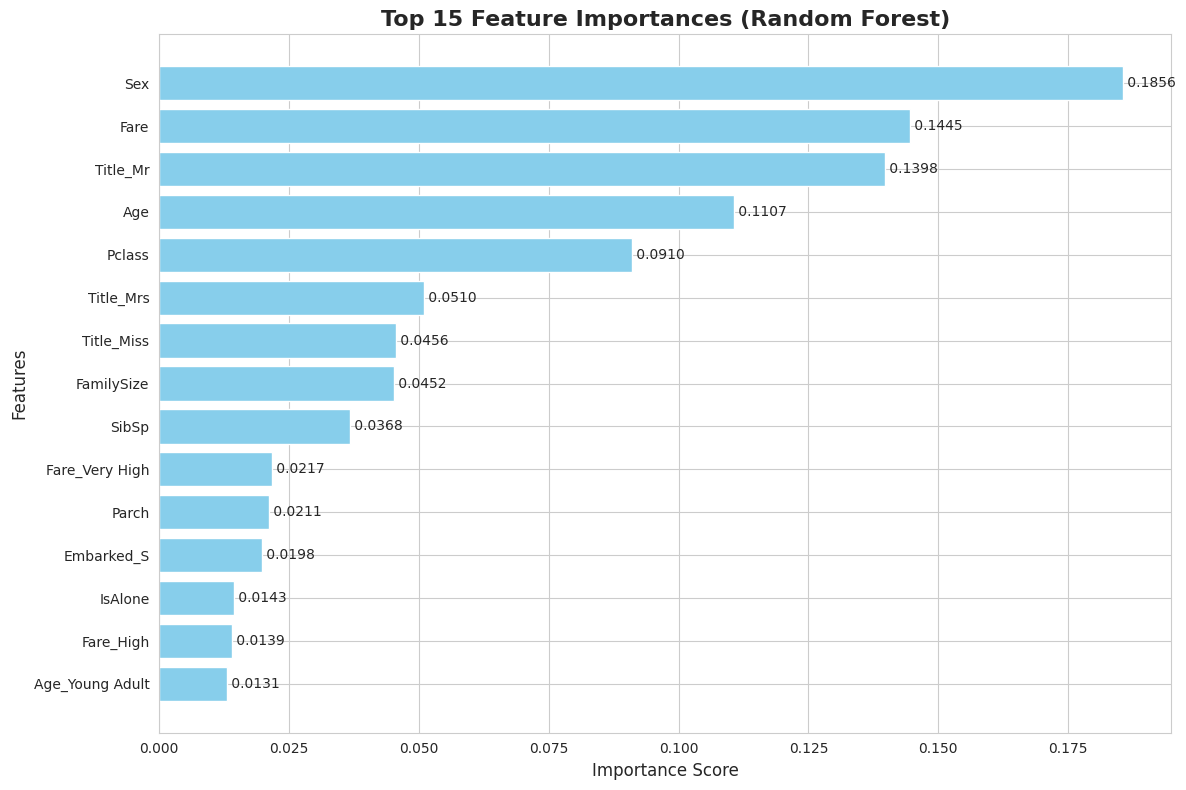


📊 Insight:
The top 3 features account for 47.0% of importance


In [23]:
#feature importance (random forest)
print("⭐ FEATURE IMPORTANCE ANALYSIS\n")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features:\n")
print(feature_importance.head(10).to_string(index=False))

# Visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f' {v:.4f}', va='center')

plt.tight_layout()
plt.show()

print("\n📊 Insight:")
print(f"The top 3 features account for {top_features.head(3)['Importance'].sum()*100:.1f}% of importance")

📈 ROC CURVE ANALYSIS

Random Forest AUC: 0.8315
Decision Tree AUC: 0.8255


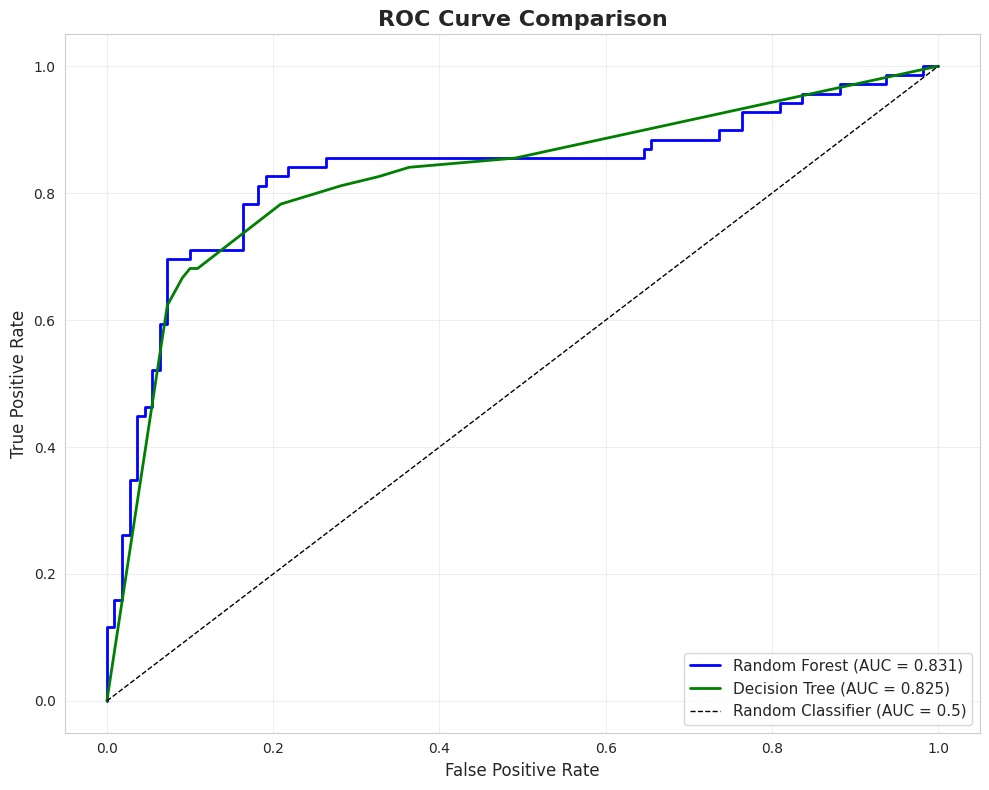


📖 AUC Interpretation:
  • AUC = 1.0: Perfect classifier
  • AUC = 0.5: Random classifier (no better than coin flip)
  • Higher AUC = Better model performance


In [24]:
# roc curve
print("📈 ROC CURVE ANALYSIS\n")

# Get probability predictions
rf_proba = rf_model.predict_proba(X_test)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)

# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_proba)
dt_auc = roc_auc_score(y_test, dt_proba)

print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Decision Tree AUC: {dt_auc:.4f}")

# Plot
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2, color='blue')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})', linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📖 AUC Interpretation:")
print("  • AUC = 1.0: Perfect classifier")
print("  • AUC = 0.5: Random classifier (no better than coin flip)")
print("  • Higher AUC = Better model performance")

In [25]:
#saving results
import pickle

# Save Random Forest model
with open('titanic_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save Decision Tree model
with open('titanic_dt_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

# Save scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("✅ Models saved successfully!")
print("\nSaved files:")
print("  • titanic_rf_model.pkl (Random Forest)")
print("  • titanic_dt_model.pkl (Decision Tree)")
print("  • scaler.pkl (Feature Scaler)")

✅ Models saved successfully!

Saved files:
  • titanic_rf_model.pkl (Random Forest)
  • titanic_dt_model.pkl (Decision Tree)
  • scaler.pkl (Feature Scaler)


In [26]:
#summary report
print("📊 FINAL PROJECT SUMMARY")
print("="*70)

summary = f"""
PROJECT: Titanic Survival Prediction
DATE: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

DATASET INFORMATION:
  • Total Passengers: {len(train_df)}
  • Features Used: {X.shape[1]}
  • Training Samples: {len(X_train)}
  • Testing Samples: {len(X_test)}

MODEL PERFORMANCE:
  Random Forest:
    - Training Accuracy: {rf_train_acc*100:.2f}%
    - Testing Accuracy:  {rf_test_acc*100:.2f}%
    - AUC Score:         {rf_auc:.4f}

  Decision Tree:
    - Training Accuracy: {dt_train_acc*100:.2f}%
    - Testing Accuracy:  {dt_test_acc*100:.2f}%
    - AUC Score:         {dt_auc:.4f}

BEST MODEL: {'Random Forest' if rf_test_acc > dt_test_acc else 'Decision Tree'}

TOP 5 IMPORTANT FEATURES:
{chr(10).join([f'  {i+1}. {row["Feature"]}: {row["Importance"]:.4f}' for i, row in feature_importance.head(5).iterrows()])}

KEY INSIGHTS:
  • Gender was the most important predictor
  • Passenger class significantly affected survival
  • Family size and being alone also played important roles
  • Random Forest performed {'better' if rf_test_acc > dt_test_acc else 'worse'} than Decision Tree

NEXT STEPS:
  1. Try hyperparameter tuning
  2. Experiment with other algorithms (XGBoost, SVM)
  3. Create ensemble models
  4. Deploy model as a web app
"""

print(summary)

# Save summary to file
with open('project_summary.txt', 'w') as f:
    f.write(summary)

print("\n✅ Summary saved to 'project_summary.txt'")

📊 FINAL PROJECT SUMMARY

PROJECT: Titanic Survival Prediction
DATE: 2026-02-10 11:48:46

DATASET INFORMATION:
  • Total Passengers: 891
  • Features Used: 21
  • Training Samples: 712
  • Testing Samples: 179

MODEL PERFORMANCE:
  Random Forest:
    - Training Accuracy: 91.15%
    - Testing Accuracy:  81.56%
    - AUC Score:         0.8315
    
  Decision Tree:
    - Training Accuracy: 91.57%
    - Testing Accuracy:  81.01%
    - AUC Score:         0.8255

BEST MODEL: Random Forest
  
TOP 5 IMPORTANT FEATURES:
  2. Sex: 0.1856
  6. Fare: 0.1445
  12. Title_Mr: 0.1398
  3. Age: 0.1107
  1. Pclass: 0.0910

KEY INSIGHTS:
  • Gender was the most important predictor
  • Passenger class significantly affected survival
  • Family size and being alone also played important roles
  • Random Forest performed better than Decision Tree

NEXT STEPS:
  1. Try hyperparameter tuning
  2. Experiment with other algorithms (XGBoost, SVM)
  3. Create ensemble models
  4. Deploy model as a web app


✅ Summ